# LAB 3: DeepFake and Stuff
### AI and Machine Learning // Suchkova Natalia М8О - 114М - 22
17.06.23 @ MAI IT-Center

In [3]:
import cv2
import matplotlib.pyplot as plt

### Восстановление цвета старых фото (+ легкое улучшение качества)

DeepAI - Deoldify - https://deepai.org/machine-learning-model/colorizer

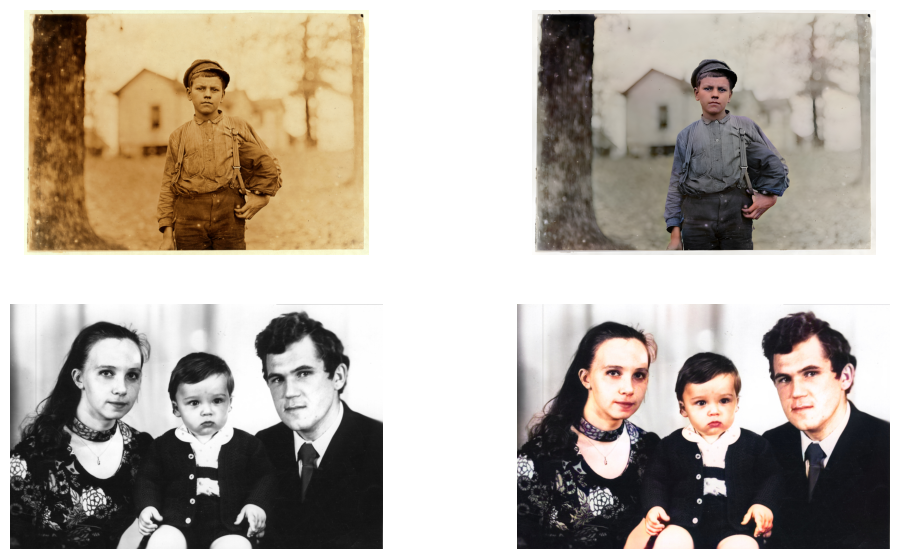

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))
for i, j in enumerate(['old.jpg', 'old2.jpg', 
                       '0090.jpg', 'gp2.jpg']):
    img = cv2.imread(j)
    ax.flat[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.flat[i].axis('off')
    
plt.show()

### Дипфейк и наложение маски на видео

thin-plate-spline-motion-model - https://replicate.com/yoyo-nb/thin-plate-spline-motion-model/examples#qco3bkaiyzginarucmzxqg4m7y

https://colab.research.google.com/drive/1wIwi2HACrqvO83QyB8YiU6GAq99ebfqt#scrollTo=0bR90x0OEeHB - код был запущен в Colab

In [15]:
import replicate
from IPython.display import HTML
from base64 import b64encode

In [28]:
def play(filename):
    html = ''
    video = open(filename,'rb').read()
    src = 'data:video/mp4;base64,' + b64encode(video).decode()
    html += '<video width=400 controls autoplay loop><source src="%s" type="video/mp4"></video>' % src 
    return HTML(html)

play('video2.mp4')

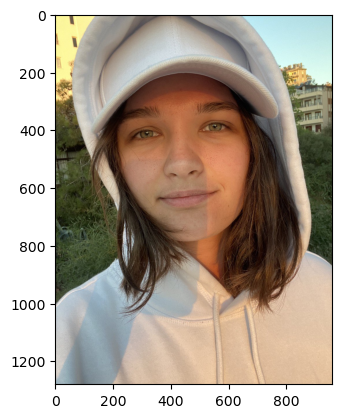

In [24]:
img = cv2.cvtColor(cv2.imread('2.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
# !pip install replicate

REPLICATE_API_TOKEN='r8_GYmXeIrZFSx3JWvWV5292sq8kVXqpI50N2L5y'
cli = replicate.Client(api_token=REPLICATE_API_TOKEN)

output = cli.run(
    "yoyo-nb/thin-plate-spline-motion-model:382ceb8a9439737020bad407dec813e150388873760ad4a5a83a2ad01b039977",
    input={"source_image": open('2.jpg', 'rb'),
           "driving_video": open('video2.mp4', 'rb')}
)
print(output)

Result - https://replicate.delivery/pbxt/nSrj2gDfi7SgUaCllUVznw6AZNZVoYyXbOIreB6ujtP3SRHRA/output.mp4 

In [29]:
play('output.mp4')

### Image Enhancement and Upscaling

GPEN - https://replicate.com/yangxy/gpen

In [30]:
# !pip install "modelscope[cv]" -f https://modelscope.oss-cn-beijing.aliyuncs.com/releases/repo.html

In [ ]:
from modelscope.pipelines import pipeline
from modelscope.utils.constant import Tasks
from modelscope.outputs import OutputKeys

In [ ]:
portrait_enhancement = pipeline(Tasks.image_portrait_enhancement, model='damo/cv_gpen_image-portrait-enhancement-hires')
result = portrait_enhancement('53300001.JPG')
cv2.imwrite('result.png', result[OutputKeys.OUTPUT_IMG])

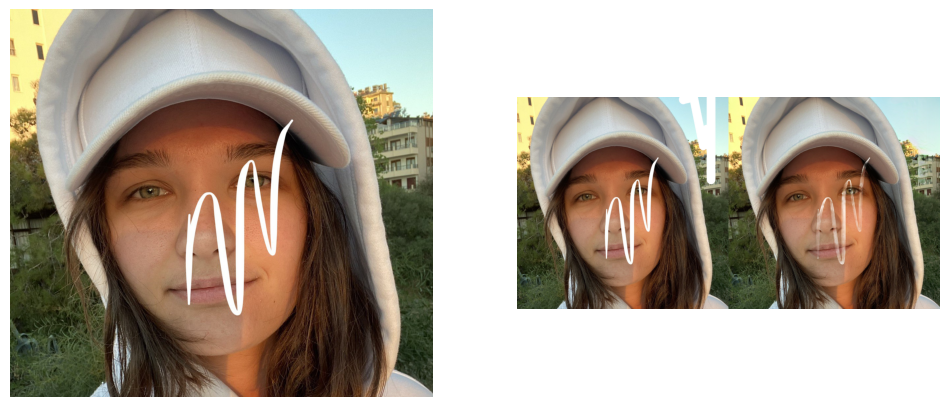

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
for i, j in enumerate(['scr.jpg', 'rpr.png']):
    img = cv2.imread(j)
    ax.flat[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.flat[i].axis('off')
    
plt.show()

### Предложение концепта проекта с применением одной из этих технологий